## **Sentiment analysis** of the **restaurant reviews** from **YELP** dataset using two **lexicon-based sentiment analyzers**: **TextBlob** and **Vader**.
- - - 



### **TASKS**:
- **PREPROCESSING** 
- **SENTIMENT ANALYSIS WITH `TEXTBLOB`**
- **SENTIMENT ANALYSIS WITH `VADER`**
- **CONCLUSIONS**
- - - 

#### The two datasets (**review** and **business**) that we need from **YELP** dataset can be found <a href="https://www.yelp.com/dataset" target="_blank">here</a>
- - - 

#### Let's install **vaderSentiment** and **langdetect** 





In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 32.6 MB/s 


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 35.9 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=e29a4e72bd5b05fcaa08c3fc4aef2b260b90c7f00dbe3139ad5ffa222bce20d6
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


#### **Importing required libraries** 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import spacy
sp = spacy.load('en_core_web_sm')
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, confusion_matrix, classification_report
from collections import Counter
import tensorflow as tf
import sys, os, warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


### **1 - Preprocessing**
- - - 


#### **Read** the **reviews** dataset. As it is a **very heavy** one, let's use only the first 10,000 rows and **reduce** the **memory usage**

In [ ]:
df = pd.read_json('/content/drive/MyDrive/yelp_academic_dataset_review.json', nrows=10000, lines=True)

In [ ]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


#### **Drop the columns** that we **won't be needing**

In [ ]:
cols_to_drop = ['review_id', 'user_id', 'useful', 'funny', 'cool', 'date'] 
df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
df.head()

,business_id,stars,text
0,buF9druCkbuXLX526sGELQ,4,Apparently Prides Osteria had a rough summer a...
1,RA4V8pr014UyUbDvI-LW2A,4,This store is pretty good. Not as great as Wal...
2,_sS2LBIGNT5NQb6PD1Vtjw,5,I called WVM on the recommendation of a couple...
3,0AzLzHfOJgL7ROwhdww2ew,2,I've stayed at many Marriott and Renaissance M...
4,8zehGz9jnxPqXtOc7KaJxA,4,The food is always great here. The service fro...


#### **Importing** the **business** dataset

In [ ]:
df1 = pd.read_json('/content/drive/MyDrive/yelp_academic_dataset_business.json', lines=True)

In [ ]:
df1.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


#### We **only** want to analyze the **restaurant** category from the **business** dataset

In [ ]:
df1 = df1[df1['categories'].notnull()]
df_rest = df1[df1['categories'].str.contains('Restaurant')]

In [ ]:
df_rest = df_rest[['business_id', 'categories']]

In [ ]:
df_rest.head()

,business_id,categories
0,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B..."
1,tCbdrRPZA0oiIYSmHG3J0w,"Salad, Soup, Sandwiches, Delis, Restaurants, C..."
5,D4JtQNTI4X3KcbzacDJsMw,"Restaurants, Thai"
7,jFYIsSb7r1QeESVUnXPHBw,"Breakfast & Brunch, Restaurants"
12,HPA_qyMEddpAEtFof02ixg,"Food, Pizza, Restaurants"


#### We want to **merge** the two datasets to analyse the **restaurant reviews**. "**business_id**" is the **common** columm of the two datasets

In [ ]:
df_merged = df.merge(df_rest, how='inner', on='business_id')

In [ ]:
del df, df_rest

In [ ]:
df_merged.head()

,business_id,stars,text,categories
0,buF9druCkbuXLX526sGELQ,4,Apparently Prides Osteria had a rough summer a...,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."
1,buF9druCkbuXLX526sGELQ,2,I was really disappointed to say the least. I ...,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."
2,buF9druCkbuXLX526sGELQ,5,This is as close to dining in Italy as you'll ...,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."
3,buF9druCkbuXLX526sGELQ,5,Great food and service! Again. 4 out of the la...,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."
4,0AzLzHfOJgL7ROwhdww2ew,2,I've stayed at many Marriott and Renaissance M...,"Hotels, Hotels & Travel, Restaurants, Event Pl..."


#### **Rename** the **text column** and **remove** the **"business_id"** column because it **isn't necessary anymore**

In [ ]:
df_merged.rename(columns={'text':'restaurant_reviews'}, inplace=True)
df_merged.drop('business_id', axis=1, inplace=True)

#### We will **only** analyse the reviews **written** in **English**

In [ ]:
from langdetect import detect 

In [ ]:
df_merged['detect'] = df_merged['restaurant_reviews'].apply(detect)
df_merged = df_merged[df_merged['detect'] == 'en'].reset_index(drop=True)

In [ ]:
# Check if there is NaN values
df_merged.isnull().values.any()

False

In [ ]:
df_merged.shape

(6987, 4)

#### Return the dataframe with **duplicate** rows **removed**

In [ ]:
df_final = df_merged.drop_duplicates()

#### As **many** of the **3 stars reviews**, most likely, have both **good and bad aspects/feelings**, we will **remove** those reviews so they **won't harm** our sentiment analysis

In [ ]:
df_final = df_final[(df_final["stars"]!=3)]
df_final.head(20)

,stars,restaurant_reviews,categories,detect
0,4,Apparently Prides Osteria had a rough summer a...,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",en
1,2,I was really disappointed to say the least. I ...,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",en
2,5,This is as close to dining in Italy as you'll ...,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",en
3,5,Great food and service! Again. 4 out of the la...,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",en
4,2,I've stayed at many Marriott and Renaissance M...,"Hotels, Hotels & Travel, Restaurants, Event Pl...",en
5,4,I was a there for a professional conference. s...,"Hotels, Hotels & Travel, Restaurants, Event Pl...",en
6,4,I stayed for five nights this past April with ...,"Hotels, Hotels & Travel, Restaurants, Event Pl...",en
7,4,I stayed here recently for a conference I was ...,"Hotels, Hotels & Travel, Restaurants, Event Pl...",en
8,4,The food is always great here. The service fro...,"Restaurants, French",en
9,2,Brasserie zero zero... we were hoping for a te...,"Restaurants, French",en


#### **Label** reviews as **positive** - **1** (4 and 5 stars) - or **negative** - **0** (1 and 2 stars) - and after that **remove** the **"stars" column**, it is not needed anymore

In [ ]:
df_final.loc[df_final['stars'] < 3, 'sentiment'] = 0 
df_final.loc[df_final['stars'] > 3, 'sentiment'] = 1
df_final.drop('stars', axis=1, inplace=True)
df_final.head(10)

,restaurant_reviews,categories,detect,sentiment
0,Apparently Prides Osteria had a rough summer a...,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",en,1.0
1,I was really disappointed to say the least. I ...,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",en,0.0
2,This is as close to dining in Italy as you'll ...,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",en,1.0
3,Great food and service! Again. 4 out of the la...,"Restaurants, Wine Bars, Nightlife, Farmers Mar...",en,1.0
4,I've stayed at many Marriott and Renaissance M...,"Hotels, Hotels & Travel, Restaurants, Event Pl...",en,0.0
5,I was a there for a professional conference. s...,"Hotels, Hotels & Travel, Restaurants, Event Pl...",en,1.0
6,I stayed for five nights this past April with ...,"Hotels, Hotels & Travel, Restaurants, Event Pl...",en,1.0
7,I stayed here recently for a conference I was ...,"Hotels, Hotels & Travel, Restaurants, Event Pl...",en,1.0
8,The food is always great here. The service fro...,"Restaurants, French",en,1.0
9,Brasserie zero zero... we were hoping for a te...,"Restaurants, French",en,0.0


#### **Stopwords** with **spaCy**. As **'no'** and **'not'** are **important** words to describe an opinion about a restaurant (e.g. not cheap, not a good service, no napkins available, etc.), we should, at least, **remove** those two words from the **stopwords**. 

In [ ]:
sp = spacy.load('en_core_web_sm')
stopwords = sp.Defaults.stop_words

exclude_stopwords = ['no','not']
for word in exclude_stopwords:
    stopwords.remove(word)

#### **UDF** to **remove non-letters**, convert to **lower case**, **tokenize**  with **NLTK** and **remove** the **spaCy stopwords** from the restaurant reviews:

In [ ]:
# The input is a single string (a raw restaurant review), and the output is a single string (a preprocessed restaurant review)

def text_preprocessing( raw_review ):
    # 1. Remove non-letters 
    review_text_letters_only = re.sub("[^a-zA-Z]", " ", raw_review)
    # 2. Convert to lower case
    review_preprocessed = review_text_letters_only.lower()
    # 3. Word tokenization
    review_tokens = word_tokenize(review_preprocessed)
    # 4. Only words with more than one letter
    review_tokens_len = [w for w in review_tokens if len(w) > 1]
    # 5. Filter the stopwords
    filtered_sentence =[] 
    for word in review_tokens_len:
        lexeme = sp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)

    return " ".join(filtered_sentence)

#### **Apply** the above **UDF** to the **entire** 'restaurant_reviews' column, **creating** a **new column** named **'cleaned_reviews'**

In [ ]:
df_final['cleaned_reviews'] = df_final['restaurant_reviews'].apply(text_preprocessing) 

In [ ]:
columns_to_drop = ['restaurant_reviews', 'categories', 'detect']
df_final.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
df = df_final.reset_index(drop=True)

In [ ]:
df.head()

,sentiment,cleaned_reviews
0,1.0,apparently prides osteria rough summer evidenc...
1,0.0,disappointed saw great yelp reviews great ones...
2,1.0,close dining italy ll find new england chef pa...
3,1.0,great food service weeks great time tuesday we...
4,0.0,ve stayed marriott renaissance marriott huge d...


### **2 - Sentiment analysis with TextBlob**
- - - 

- When we use **TextBlob** to **calculate** the **sentiment** of a **text**, we get **numeric values for polarity and subjectivity**. The **polarity numeric number indicates how negative or positive a sentence is**. Subjectivity, on the other hand, refers to how objective or subjective a text is. 
<br><br>
- Let's **calculate only** the **polarity** of each of the '**cleaned reviews**':

In [ ]:
def detect_polarity(cleaned_reviews):
    return TextBlob(cleaned_reviews).sentiment.polarity

In [ ]:
df_final['polarity'] = df_final.cleaned_reviews.apply(detect_polarity)

In [ ]:
df_final.head()

,sentiment,cleaned_reviews,polarity
0,1.0,apparently prides osteria rough summer evidenc...,0.166361
1,0.0,disappointed saw great yelp reviews great ones...,0.129482
2,1.0,close dining italy ll find new england chef pa...,0.308838
3,1.0,great food service weeks great time tuesday we...,0.637143
4,0.0,ve stayed marriott renaissance marriott huge d...,0.225000


#### **Most common words** in **positive** and **negative reviews** 

In [ ]:
def tokenize_text(text):
    words = word_tokenize(text)
    return words

In [ ]:
df_final['lexicon_reviews'] = df_final['cleaned_reviews'].apply(tokenize_text) 

In [ ]:
Positive_sent = df_final[df_final['sentiment']==1]
Negative_sent = df_final[df_final['sentiment']==0]

- **Most common words** in **positive reviews**

In [ ]:
top = Counter([item for sublist in Positive_sent['lexicon_reviews'] for item in sublist])
common_positive = pd.DataFrame(top.most_common(20))
common_positive.columns = ['Most Common Words','count']
common_positive.style.background_gradient(cmap='Greens')

,Most Common Words,count
0,food,3101
1,good,2923
2,place,2674
3,great,2592
4,service,1507
5,like,1441
6,time,1213
7,delicious,1209
8,ve,1077
9,best,1074


#### **Comment**: The **co-occurence** of **words** that **show positive sentiments** such as **'great', 'delicious, 'best', 'love', 'friendly'** with **words** like **'food', 'service', 'place', 'time'** enlight us about what are the **most important things for a customer to have a positive review about a restaurant** (even the fact that the word 'chicken' appears so many times seems to be an indication that chicken it is one of the favourite foods).

- **Most common words** in **negative reviews**

In [ ]:
top = Counter([item for sublist in Negative_sent['lexicon_reviews'] for item in sublist])
common_negative = pd.DataFrame(top.most_common(20))
common_negative.columns = ['Most Common Words','Count']
common_negative.style.background_gradient(cmap='Blues')

,Most Common Words,Count
0,food,1228
1,place,735
2,service,680
3,good,666
4,like,647
5,no,606
6,time,526
7,order,492
8,ordered,427
9,came,354


#### **Comment**: **negations**, such as, **'no', didn't** and **don't, show up many times** in the **negative reviews**. This **means** that the **food, service** and **place** (these three words are among the top 3 most common words) **are not what customers would like them to be**.<br>

##### **UDF for plotting the heatmap** of **the confusion matrices**

In [ ]:
def evaluate(y_test, predictions):
    cf_matrix = confusion_matrix(y_test, predictions)
    sns.set(font_scale=1.2)
    sns.heatmap(cf_matrix, annot = True, fmt = 'd',cmap="Blues")
    plt.title('Heatmap of confusion matrix', fontsize=16)
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)  

####  To **predict** the **sentiment** of each **cleaned review** we will **use** the **polarity scores**:

In [ ]:
df_final['blob_polarity'] = np.where(df_final['polarity']>0, 1, 0)
target_names = ['negative', 'positive']
print(classification_report(df_final['sentiment'], 
                            df_final['blob_polarity'],
                            target_names=target_names,
                            digits = 3))

              precision    recall  f1-score   support

    negative      0.837     0.450     0.586      1348
    positive      0.859     0.975     0.913      4643

    accuracy                          0.857      5991
   macro avg      0.848     0.712     0.749      5991
weighted avg      0.854     0.857     0.840      5991



#### **Comment**: The **performance on positive and negative sentiment** of the **'cleaned reviews' looks different**: we have **much higher recall and high precision** for **positive reviews** when **compared to negative reviews**.

#### **Heatmap** of **confusion matrix**

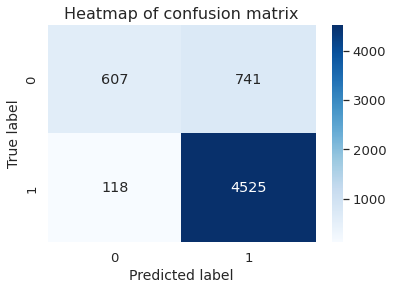

In [ ]:
evaluate(df_final['sentiment'], df_final['blob_polarity'])

#### **Comment**: the **predictions are biased towards positive sentiment**, just below **88%** of our **predictions are positive**.
<br>

### **3 - Sentiment analysis with VADER**
- **VADER** produces **four sentiment measurements**: 
    - **pos, neu** and **neg** scores **add up to 1** and show the proportion of text/content that falls into each of those three categories.
    - **Compound**: **aggregated score normalized** to be **between -1 and 1**.

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
columns_to_drop = ['polarity', 'blob_polarity']
df_final.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
df_final[['neg', 'neu', 'pos', 'compound']] = df_final['cleaned_reviews'].apply(sid.polarity_scores).apply(pd.Series)
df_final.head()

,sentiment,cleaned_reviews,lexicon_reviews,neg,neu,pos,compound
0,1.0,apparently prides osteria rough summer evidenc...,"[apparently, prides, osteria, rough, summer, e...",0.023,0.735,0.242,0.9879
1,0.0,disappointed saw great yelp reviews great ones...,"[disappointed, saw, great, yelp, reviews, grea...",0.081,0.685,0.234,0.9851
2,1.0,close dining italy ll find new england chef pa...,"[close, dining, italy, ll, find, new, england,...",0.000,0.784,0.216,0.7096
3,1.0,great food service weeks great time tuesday we...,"[great, food, service, weeks, great, time, tue...",0.000,0.381,0.619,0.9393
4,0.0,ve stayed marriott renaissance marriott huge d...,"[ve, stayed, marriott, renaissance, marriott, ...",0.081,0.587,0.333,0.8519


####  To **predict** the **sentiment** of each **cleaned review** we will **use first** the **pos** and **neg scores** and then the **compound score**:

In [ ]:
df_final['vader_prediction'] = np.where(df_final['pos']>df_final['neg'], 1, 0)
target_names=['negative', 'positive']
print(classification_report(df_final['sentiment'], df_final['vader_prediction'], target_names=target_names, digits=3))

              precision    recall  f1-score   support

    negative      0.845     0.372     0.517      1348
    positive      0.843     0.980     0.907      4643

    accuracy                          0.843      5991
   macro avg      0.844     0.676     0.712      5991
weighted avg      0.844     0.843     0.819      5991



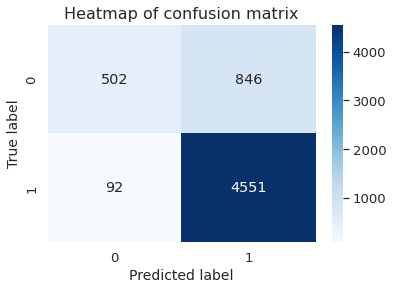

In [ ]:
evaluate(df_final['sentiment'], df_final['vader_prediction'])

In [ ]:
df_final['vader_compound_prediction'] = np.where(df_final['compound']>0, 1, 0)
print(classification_report(df_final['sentiment'], df_final['vader_compound_prediction'], target_names=target_names, digits=3))

              precision    recall  f1-score   support

    negative      0.851     0.367     0.513      1348
    positive      0.842     0.981     0.906      4643

    accuracy                          0.843      5991
   macro avg      0.846     0.674     0.710      5991
weighted avg      0.844     0.843     0.818      5991



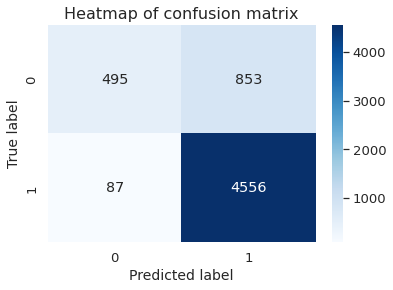

In [ ]:
evaluate(df_final['sentiment'], df_final['vader_compound_prediction'])

#### **Comments**: 
- The **scores for all metrics are very similar using pos and neg scores or using the compound score**. 
- The **predictions are biased towards positive sentiment**, approximately **90%** of the predictions are **positive**.
<br><br>

### **4 - Conclusions**:
- When **comparing the use** of **TextBlob** and **Vader to predict the sentiment of restaurant reviews from Yelp dataset** one can **draw** the **following conclusions**:
    - The **predictions** of **both lexicon-based sentiment analyzers are biased towards positive sentiment**.
    - The **scores achieved** for **accuracy** and **F1 scores** (regarding both positive and negative sentiment) **are higher using TextBlob**, which allows us to say that **TextBlob performs better than Vader in the current context**. 